<a href="https://colab.research.google.com/github/Enrico-Call/RL-AKI/blob/create-notebook/Data_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/AmsterdamUMC/AmsterdamUMCdb/blob/master/img/logo_amds.png?raw=1" alt="Logo" width=128px/>

# VUmc Research Project - Reinforcement Learning for Sepsis Prevention
# Data Extraction

AmsterdamUMCdb version 1.0.2 March 2020  
Copyright &copy; 2003-2021 Amsterdam UMC - Amsterdam Medical Data Science

## 1. Set up the environment variables for Colab and GoogleBigQuery to access

In [2]:
import os
from google.colab import auth
from google.cloud.bigquery import magics
from google.cloud import bigquery

#sets dateset
DATASET_PROJECT_ID = 'amsterdamumcdb-data'
DATASET_ID = 'ams102'
LOCATION = 'eu'

#sets the project id
PROJECT_ID = "rl-aki"

#all libraries check this environment variable, so set it:
os.environ["GOOGLE_CLOUD_PROJECT"] = PROJECT_ID

#sets the default query job configuration
def_config = bigquery.job.QueryJobConfig(default_dataset=DATASET_PROJECT_ID + "." + DATASET_ID)
magics.context.default_query_job_config = def_config

#sets client options job configuration
client_options = {}
client_options['location'] = LOCATION
magics.context.bigquery_client_options = client_options

auth.authenticate_user()
print('Authenticated')

KeyboardInterrupt: ignored

### 1.1. Available documentation for AmsterdamUMCdb tables.
Additional information including sample Python code in Jupyter Notebooks and [SQL](https://github.com/AmsterdamUMC/AmsterdamUMCdb/tree/master/amsterdamumcdb/sql) is available from the official [AmsterdamUMCdb GitHub repository](https://github.com/AmsterdamUMC/AmsterdamUMCdb) and [wiki](https://github.com/AmsterdamUMC/AmsterdamUMCdb/wiki). 

Table | Wiki | Example code
:- | :--| -:
admissions|https://github.com/AmsterdamUMC/AmsterdamUMCdb/wiki/admissions | [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AmsterdamUMC/AmsterdamUMCdb/blob/master/tables/admissions.ipynb) 
drugitems|https://github.com/AmsterdamUMC/AmsterdamUMCdb/wiki/drugitems|[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AmsterdamUMC/AmsterdamUMCdb/blob/master/tables/drugitems.ipynb) 
freetextitems|https://github.com/AmsterdamUMC/AmsterdamUMCdb/wiki/freetextitems|[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AmsterdamUMC/AmsterdamUMCdb/blob/master/tables/freetextitems.ipynb)
listitems|https://github.com/AmsterdamUMC/AmsterdamUMCdb/wiki/lisitems|[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AmsterdamUMC/AmsterdamUMCdb/blob/master/tables/listitems.ipynb)
numericitems|https://github.com/AmsterdamUMC/AmsterdamUMCdb/wiki/numericitems|[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AmsterdamUMC/AmsterdamUMCdb/blob/master/tables/numericitems.ipynb)
procedureorderitems|https://github.com/AmsterdamUMC/AmsterdamUMCdb/wiki/procedureorderitems|[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AmsterdamUMC/AmsterdamUMCdb/blob/master/tables/procedureorderitems.ipynb)
processitems|https://github.com/AmsterdamUMC/AmsterdamUMCdb/wiki/processitems|[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AmsterdamUMC/AmsterdamUMCdb/blob/master/tables/processitems.ipynb)

**Note**: In contrast to the publicly available version of AmsterdamUMCdb, we have moved *unvalidated* (device) data (`registeredby IS NULL`) from the `numericitems` table to a separate table `unvalidatednumericitems` to reduce query costs when unvalidated device data is not needed. However, depending on the chosen solution, you may need to combine the data from both tables.

### 1.3. Enable data table display

Colab includes the `google.colab.data_table` package that can be used to display Pandas dataframes as an interactive data table (limitations: `max_rows = 20000`, `max_columns = 20`). This is especially useful when exploring the  tables or dictionary from AmsterdamUMCdb. It can be enabled with:

In [ ]:
%load_ext google.colab.data_table

# Running your first query on AmsterdamUMCdb
BigQuery provides different ways to query the dataset:
- **magics**: the `google.cloud.bigquery` library  includes a *magic* command which runs a query and either displays the result or saves it to a Pandas DataFrame`. The main advantage of this technique is that it improves readability of SQL code by syntax highlighting. Its main limitation: it requires a separate cell for the query, so cannot be combined with other Python code in the same code cell.

Let's query the `admissions` table using magics.

## Set the default query job configuration for magics

## Query the admission table and copy the data to the `admissions` Pandas dataframe:

The admissions table contains the ICU admissions of all patients in AmsterdamUMCdb. More information can be found here: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AmsterdamUMC/AmsterdamUMCdb/blob/master/tables/admissions.ipynb)

Since this is a relatively small table, it is acceptable to use `SELECT *`. 

In [ ]:
%%bigquery admissions
SELECT * FROM admissions

## Display the first 1000 rows of the `admissions` dataframe.

In [ ]:
admissions.head(1000)

,patientid,admissionid,admissioncount,location,urgency,origin,admittedat,admissionyeargroup,dischargedat,lengthofstay,destination,gender,agegroup,dateofdeath,weightgroup,weightsource,heightgroup,heightsource,specialty
0,117,130,1,MC,0,None,0,2003-2009,91560000,26,None,Man,70-79,NaN,70-79,None,180-189,None,None
1,570,656,1,MC,0,None,0,2003-2009,90780000,25,None,Man,70-79,2.294424e+11,60-69,None,160-169,None,None
2,700,799,1,MC,0,None,0,2003-2009,104460000,29,None,Man,60-69,NaN,70-79,None,170-179,None,None
3,817,941,1,MC,0,None,0,2003-2009,86580000,24,None,Man,70-79,1.626498e+11,60-69,None,160-169,None,None
4,951,1098,1,MC,0,None,0,2003-2009,75000000,20,None,,70-79,NaN,60-69,None,170-179,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1923,2211,1,IC,0,None,0,2010-2016,83940000,23,15,Vrouw,70-79,3.451962e+10,70-79,None,170-179,None,Cardiochirurgie
996,1927,2215,1,IC,0,None,0,2003-2009,281400000,78,15,Vrouw,60-69,NaN,90-99,None,160-169,None,Cardiochirurgie
997,1930,2218,1,IC,0,CCU/IC zelfde ziekenhuis,0,2010-2016,88500000,24,15,Man,60-69,NaN,90-99,None,160-169,None,Cardiochirurgie
998,1934,2223,1,IC,0,None,0,2003-2009,70200000,19,15,Man,60-69,NaN,70-79,None,170-179,None,Cardiochirurgie


# Query AmsterdamUMCdb through google-cloud-bigquery

Alternatively, we can manually invoke the `biqquery` Python module. The examples used the previously entered `PROJECT_ID`.

See [BigQuery documentation](https://cloud.google.com/bigquery/docs) and [library reference documentation](https://googlecloudplatform.github.io/google-cloud-python/latest/bigquery/usage.html).

## Set the default query job configuration for google-cloud-bigquery client

In [ ]:
from google.cloud import bigquery

#BigQuery requires a separate config to prevent the 'BadRequest: 400 Cannot explicitly modify anonymous table' error message
job_config = bigquery.job.QueryJobConfig()

#sets default client settings by re-using the previously defined config
client = bigquery.Client(project=PROJECT_ID, location=LOCATION, default_query_job_config=def_config)

## Get all patients and group by age group

In [ ]:
age_groups = client.query(
    '''
    SELECT 
      agegroup
      , COUNT(*) AS number_of_admissions -- COUNT(*) counts everything including NULL
    FROM admissions
    GROUP BY agegroup
    ORDER BY agegroup ASC
    '''
    , job_config=job_config).to_dataframe()

age_groups

,agegroup,number_of_admissions
0,18-39,2551
1,40-49,2177
2,50-59,3952
3,60-69,6091
4,70-79,6074
5,80+,2261


## Show a plot
Uses the Pandas built-in functions to plot a bar chart.

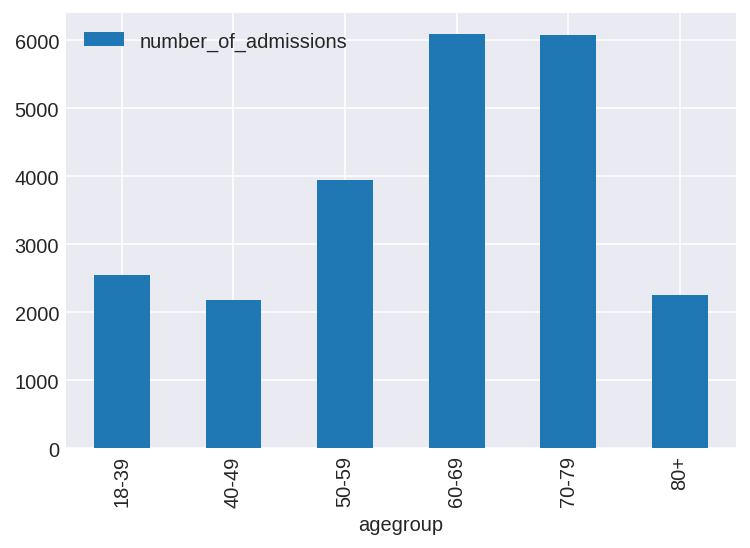

In [ ]:
# modifies the pyplot back-end of Pandas to increase render resolution
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams["figure.dpi"] = 144

age_groups.plot(kind='bar', x='agegroup')

# Query AmsterdamUMCdb through pandas-gbq

The third option is to to query the dataset using the Pandas `pandas-gbq` library. Especially when you are familiar with the `pandas.read_sql` function, it's relatively straightforward to modify your existing code to be compatible with BigQuery.

[Pandas GBQ Documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_gbq.html)

## Set the default query job configuration for pandas-gbq

In [ ]:
import pandas as pd

config_gbq = {'query': 
          {'defaultDataset': {
              "datasetId": DATASET_ID, 
              "projectId": DATASET_PROJECT_ID
              },
           'Location': LOCATION}
           }

## Retrieve the medical specialty associated with each admission

In [ ]:
specialties = pd.read_gbq(
    '''
    SELECT specialty, COUNT(*) AS number_of_admissions
    FROM admissions
    GROUP BY specialty
    ORDER BY number_of_admissions DESC 
    '''
    , configuration=config_gbq)
specialties.plot(kind='bar', x='specialty')

# The challenges
## Track 1: Atrial fibrillation in the ICU: When, why, who?
New atrial fibrillation is common in critical illness and has important haemodynamic and possibly neurological consequences. This track in the datathon invites teams to use data to investigate this. Clinical questions might include: Who will get it and when? Is it avoidable? What are its consequences? Can you predict and understand this better with data?

## Track 2: Steroids: Should I, shouldn’t I?
The debate about steroids in sepsis and septic shock will probably go on forever. In this track, teams are asked to look at their use and impact. Questions might address issues such as how well do they actually work? When should they be started, at what dose and in who? RCTs address the population- but can you use data to address the individual?

## Track 3: Lactate: Friend, foe or just inevitable?
Everyone knows that lactate is a predictor of outcome. But its origins are metabolically complicated and how much does it just represent physiological stress? Do we really need to measure it (so much)? Questions for this track could include what predicts lactate increase and decrease? What individual treatment strategies might affect lactate levels and how effective are they? Are there individuals or circumstances where it’s measurement is crucial (or situations where it is unnecessary)?



# Getting the data you need
The `amsterdamumcdb` package provides the `get_dictionary()` function that returns a DataFrame containing all items and itemids in AmsterdamUMCdb. In combination with BiqQuery DataTables, it's possible to quickly locate an item of interest. Since AmsterdamUMCdb originated from a real Dutch ICU database, the original item names are in Dutch. For common ICU parameters, translations have been provided. Full mapping to [LOINC](https://decor.nictiz.nl/art-decor/loinc) and [SNOMED CT](https://decor.nictiz.nl/art-decor/snomed-ct) is currently in progress, but we are happy to take [pull requests](https://github.com/AmsterdamUMC/AmsterdamUMCdb/pulls) for the [dictionary.csv](https://github.com/AmsterdamUMC/AmsterdamUMCdb/blob/master/amsterdamumcdb/dictionary/dictionary.csv) file, if you have any improvements to the file.

## Install the AmsterdamUMCdb package

In [ ]:
#get the amsterdamumcdb package from PiPy repository for use in Colab
!pip install amsterdamumcdb
import amsterdamumcdb as adb

## Load the AmsterdamUMCdb dictionary. 
Use the **Filter** button to quickly browse through the dictionary.

In [ ]:
dictionary = adb.get_dictionary()
dictionary

# Example: Lactate
Lactate, a laboratory measurement, can be found in the `numericitems` table. More information on `numericitems`:  [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AmsterdamUMC/AmsterdamUMCdb/blob/master/tables/numericitems.ipynb)

Since this is a large table, it is highly recommended to only process the required columns.

## Get all lactate itemids

In [ ]:
lactate_ids = dictionary[dictionary['item'].str.contains(r'la[ck]taat|lactate', regex=True, case=False)]
lactate_ids

## Get lactate values for all patients

In [ ]:
lactate = pd.read_gbq(
    '''
    SELECT admissionid, itemid, value, unitid, measuredat, registeredby
    FROM numericitems
    WHERE itemid IN (
      10053	--Lactaat (bloed)
      ,6837 --Laktaat
      ,9580 --Laktaat Astrup
    )
    '''
    , configuration=config_gbq)
lactate.head(1000)

### Plot lactate values using default pandas histogram function

In [ ]:
lactate['value'].hist()

### Plot lactate values using outlier aware histogram from AmsterdamUMCdb library

In [ ]:
adb.outliers_histogram(data=lactate['value']).show()

In [ ]:
adb.outliers_histogram(data=lactate['value'], z_threshold=16).show()

In [ ]:
lactate[lactate['value'] > 15].sort_values('value', ascending=False)

This table demonstrates that the top 6 highest values are most likely data entry errors. They were also manually documented, instead of filed by the system (Dutch: 'Systeem')

## Example: Steroids
Steroids, or more specifically [corticosteroids](https://www.whocc.no/atc_ddd_index/?code=H02AB&showdescription=yes), are commonly prescribed drugs in the ICU. All medication administration can be found in the `drugitems` table. Please thoroughly read the documentation, since interpretation of medication administration records is prone to errors. In addition it recommended to keep most columns available for data analysis/exploration, with the exception of columns that contain redundant data (e.g. human readable names). More information on `drugitems`: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AmsterdamUMC/AmsterdamUMCdb/blob/master/tables/drugitems.ipynb)

In [ ]:
steroids = pd.read_gbq(
    '''
    SELECT 
      admissionid
      --,orderid
      --,ordercategoryid
      --ordercategory
      ,itemid
      --,item
      ,isadditive
      ,isconditional
      ,rate
      ,rateunit
      --,rateunitid
      --,ratetimeunitid
      ,doserateperkg
      ,dose
      ,doseunit
      ,doserateunit
      --,doseunitid
      --,doserateunitid
      ,administered
      ,administeredunit
      --,administeredunitid
      ,action
      ,start
      ,stop
      ,duration
      --,solutionitemid
      --,solutionitem
      --,solutionadministered
      --,solutionadministeredunit
      ,fluidin
      ,iscontinuous
    FROM drugitems
    WHERE itemid IN (
      --intravenous
      7106	--Hydrocortison (Solu Cortef)
      ,6995	--Dexamethason
      ,6922	--Prednisolon (Prednison)
      ,6922	--Prednisolon (Prednison)
      ,8132	--Methylprednisolon (Solu-Medrol)	

      --non intravenous
      ,6995	--Dexamethason
      ,7106	--Hydrocortison (Solu Cortef)
      ,9130	--Prednisonum
    )
    '''
    , configuration=config_gbq)
steroids.head(1000)

## Example: Atrial Fibrillation
Atrial fibrillation is a common rhythm disorder in the ICU. It has been documented as a categorical (list) value in the `listitems` table as part of the `Hartritme` (heart rhytm) item. Listitems contains both validated as well as unvalidated device data (`registeredby IS NULL`). With `SELECT *` 3.0 GB of data will be processed. This can be reduced to < 1.0 GB by removing unneeded columns, e.g. item and value strings and some metadata.

More information on `listitems`: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AmsterdamUMC/AmsterdamUMCdb/blob/master/tables/listitems.ipynb)

In [ ]:
afib = pd.read_gbq(
    '''
    SELECT
      admissionid
      ,itemid
      --,item
      ,valueid
      --,value
      ,measuredat
      --,registeredat
      --,registeredby
      --,updatedat
      --,updatedby
      --,islabresult
    FROM listitems
    WHERE 
      itemid = 6671	--Hartritme
      AND valueid = 13	--Atr fib
    '''
    , configuration=config_gbq)
afib.head(1000)

## Conclusion
This finalizes our tutorial on accessing AmsterdamUMCdb using BigQuery. 

### What's next?
- Have a look at the AmsterdamUMCdb [wiki](https://github.com/AmsterdamUMC/AmsterdamUMCdb/wiki).
- Check more in depth examples for all tables, including those not mentioned in this tutorial:

Table | Wiki | Example code
:- | :--| -:
admissions|https://github.com/AmsterdamUMC/AmsterdamUMCdb/wiki/admissions | [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AmsterdamUMC/AmsterdamUMCdb/blob/master/tables/admissions.ipynb) 
drugitems|https://github.com/AmsterdamUMC/AmsterdamUMCdb/wiki/drugitems|[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AmsterdamUMC/AmsterdamUMCdb/blob/master/tables/drugitems.ipynb) 
freetextitems|https://github.com/AmsterdamUMC/AmsterdamUMCdb/wiki/freetextitems|[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AmsterdamUMC/AmsterdamUMCdb/blob/master/tables/freetextitems.ipynb)
listitems|https://github.com/AmsterdamUMC/AmsterdamUMCdb/wiki/lisitems|[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AmsterdamUMC/AmsterdamUMCdb/blob/master/tables/listitems.ipynb)
numericitems|https://github.com/AmsterdamUMC/AmsterdamUMCdb/wiki/numericitems|[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AmsterdamUMC/AmsterdamUMCdb/blob/master/tables/numericitems.ipynb)
procedureorderitems|https://github.com/AmsterdamUMC/AmsterdamUMCdb/wiki/procedureorderitems|[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AmsterdamUMC/AmsterdamUMCdb/blob/master/tables/procedureorderitems.ipynb)
processitems|https://github.com/AmsterdamUMC/AmsterdamUMCdb/wiki/processitems|[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AmsterdamUMC/AmsterdamUMCdb/blob/master/tables/processitems.ipynb)

- Start a discussion with your Team members on how to approach the challenge.
